In [1]:
import os
import glob
import pandas as pd
os.chdir("/cargo/public/catdata/gps-ps1-cat-coord/n64hp_goodph/")
#os.chdir("/store/public/databases/pugpq/calcounts/")

import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic
from astropy.coordinates import SkyCoord
import astropy.units as u

In [3]:
extension = 'csv'
all_filenames = [i for i in 
                 glob.glob('/cargo/public/catdata/gps-ps1-cat-coord/n256hp_goodph/*.{}'.format(extension))]

In [6]:
#combine all files in the list
i = 0
df_list = []
for f in all_filenames:
    i += 1
    df_list.append(pd.read_csv(f))
    print(i)
    
combined_csv = pd.concat(df_list)
combined_csv.reset_index(inplace=True,drop=True)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [7]:
combined_csv.shape

(325673408, 5)

In [5]:
# #combine all files in the list
# i = 0
# for f in all_filenames:
#     i += 1
#     if i == 1:
#         combined_csv = pd.read_csv(f)
#     else:
#         combined_csv = pd.concat([pd.read_csv(f), combined_csv])
#         combined_csv.reset_index(drop=True, inplace=True)
#     print(i)
    
    
# #combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [8]:
combined_csv.head()

,ra,dec,ebv,n64pix,n256pix
0,310.949795,40.127916,2.549077,25273,404197
1,310.950512,40.186903,2.508388,25017,403173
2,310.952028,40.286254,2.371328,25017,403173
3,310.951902,40.188231,2.442624,25017,403173
4,310.953245,40.116288,2.549077,25273,404197


In [9]:
hptb = combined_csv.groupby('n256pix').size()
hptb

n256pix
320000      539
321024     4988
322047     1677
322048    10110
322049     3351
          ...  
562109       10
562110      372
562111      122
563133       43
563134       25
Length: 44397, dtype: int64

In [10]:
nside = 256
npix = hp.nside2npix(nside)

The area per pix is 0.052 deg^2 and the highest density per pix is 922852.216


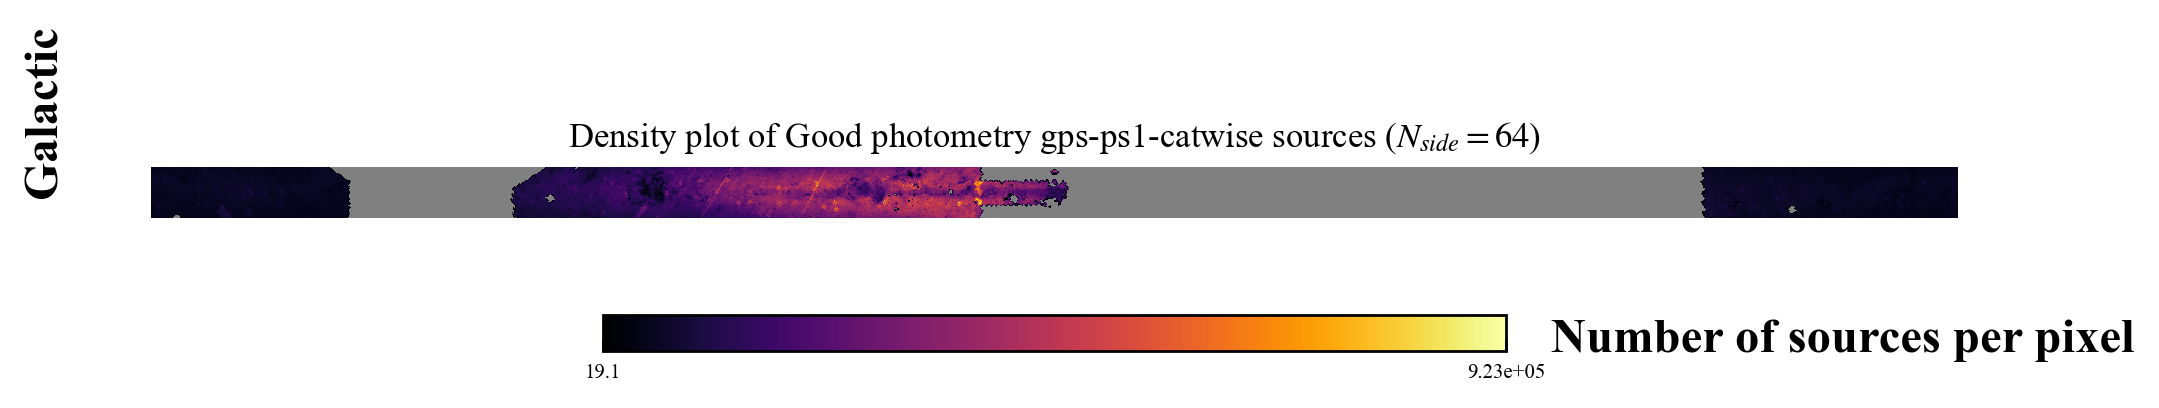

In [29]:
pi = np.pi
ssky = 4 * pi * ((180 / pi)**2)
spix = ssky / npix
sig_max = hptb.max() / (ssky / npix)
print('The area per pix is {0:.3f} deg^2 and the highest density per\
 pix is {1:.3f}'.format(spix, sig_max))

hpxmap = np.zeros(npix, dtype=float)
for i in hptb.index.values:
    hpxmap[i] = hptb[i]  # 只填充有值的位置
hpxmap = hpxmap/spix
hpxmap[hpxmap == 0] = 'nan'
# hpxmap[hpxmap <= 0] = hp.pixelfunc.UNSEEN

cartb = hp.cartview(hpxmap,
                    coord=["G"],
                    latra = [-5,5],  # 限制正负五度天区
                    cmap='inferno',
                    unit="Number of sources per pixel",
                    xsize=1800, 
                    return_projected_map=True,
                   title="Density plot of Good photometry gps-ps1-catwise sources ($N_{side}=64$)")


map_dump = pd.DataFrame(cartb)

In [30]:
sig_min = hptb.min() / (ssky / npix)
sig_median = np.median(hptb) / (ssky / npix)
sig_max = hptb.max() / (ssky / npix)

print('min density:',sig_min)
print('median density:',sig_median)
print('max density:',sig_max)

min density: 19.06364964311673
median density: 66665.5828019792
max density: 922852.2155736377


In [31]:
cmallgood_b5 = map_dump.values
cmallgood_b5.shape

(50, 1800)

In [32]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# plt.rcParams["figure.figsize"] = (10,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 100 # 提高图片分辨率

<ipython-input-33-924d512fcc7d>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hpxmap = np.zeros(npix, dtype=np.float)
0.0 180.0 -180.0 180.0


The area per pix is 0.052 deg^2 and the highest density per pix is 922852.216


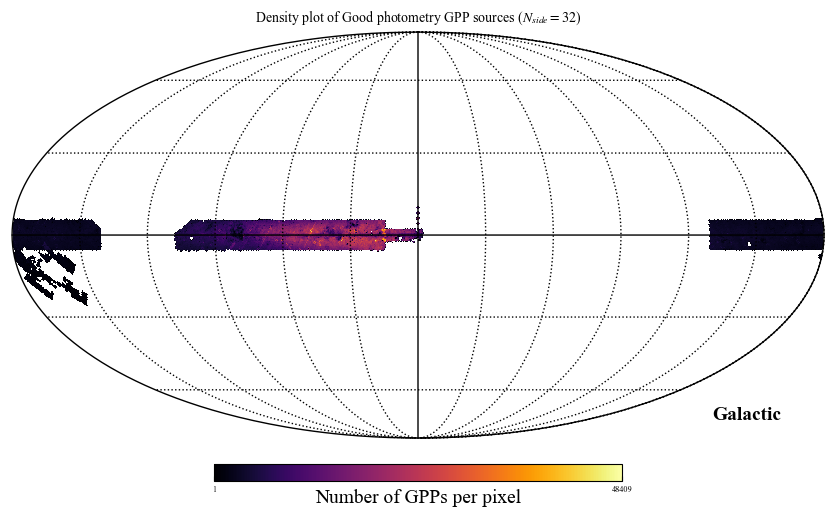

In [33]:
hpxmap = np.zeros(npix, dtype=np.float)
for i in hptb.index.values:
    hpxmap[i] = hptb[i]
hpxmap[hpxmap == 0] = 'nan'

hp.mollview(hpxmap,
            coord=["G"],
            cmap='inferno',
            badcolor='w',
            bgcolor='w',
            unit="Number of GPPs per pixel",
            xsize=1000,
            title="Density plot of Good photometry GPP sources ($N_{side}=32$)")
hp.graticule()
f = plt.gcf()
f.savefig('/cargo/public/catdata/gpq_nir/densGPP-goodph.pdf')

pi = np.pi
ssky = 4 * pi * ((180 / pi)**2)
spix = ssky / npix
sig_max = hptb.max() / (ssky / npix)
print('The area per pix is {0:.3f} deg^2 and the highest density per\
 pix is {1:.3f}'.format(spix, sig_max))

In [34]:
iring = np.arange(npix)
inest = hp.ring2nest(nside, iring)
hp.write_map('/cargo/public/catdata/gpq_nir/GPP_healpixmap-goodph.fits',
             m=[iring, inest, hpxmap],
             coord='G',
             column_names=['iring', 'inest', 'map'],
             fits_IDL=False,
             overwrite=True)

setting the output map dtype to [dtype('int64'), dtype('int64'), dtype('float64')]


In [25]:
SMALL_SIZE = 6
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE, family='serif')    # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# plt.rc('font', family='serif')    # controls default text sizes
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.serif'] = ['Times New Roman']
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

# plt.rcParams["figure.figsize"] = (10,4) # 调整图片尺寸
plt.rcParams["figure.dpi"] = 250 # 提高图片分辨率

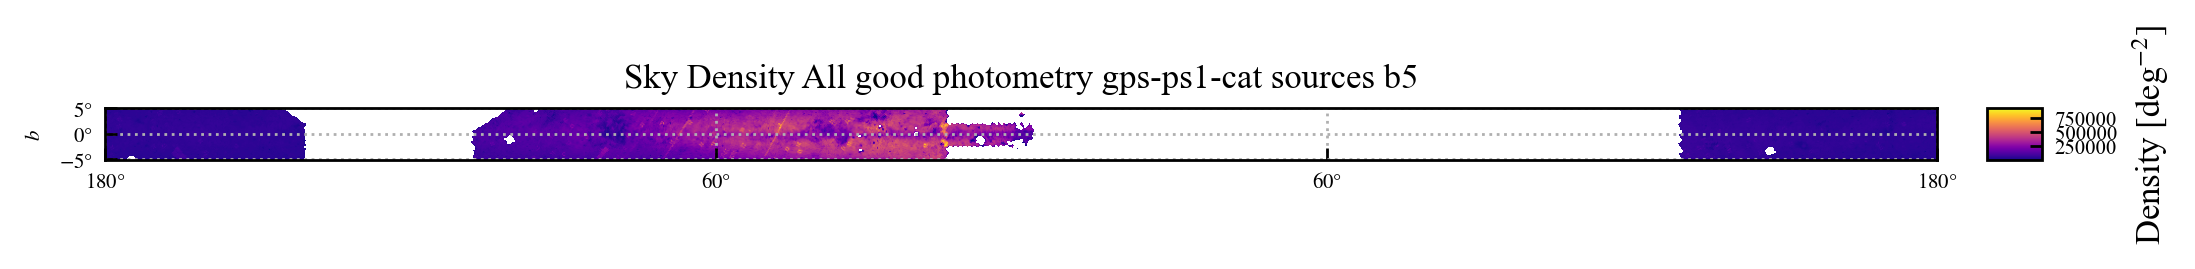

In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='3%', pad=0.2)
im = ax1.imshow(cmallgood_b5.data,
                origin='lower',
                cmap='plasma',
#                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
               )
ax1.set_xticks(np.arange(0, 1801, 600))
ax1.set_xticklabels((r'$180\degree$',r'$60\degree$',
                      r'$60\degree$',r'$180\degree$'))

ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('Sky Density All good photometry gps-ps1-cat sources b5')

# im.set_clim(250000, 1000000)
# plt.colorbar(im, cax=cax)
# plt.show()

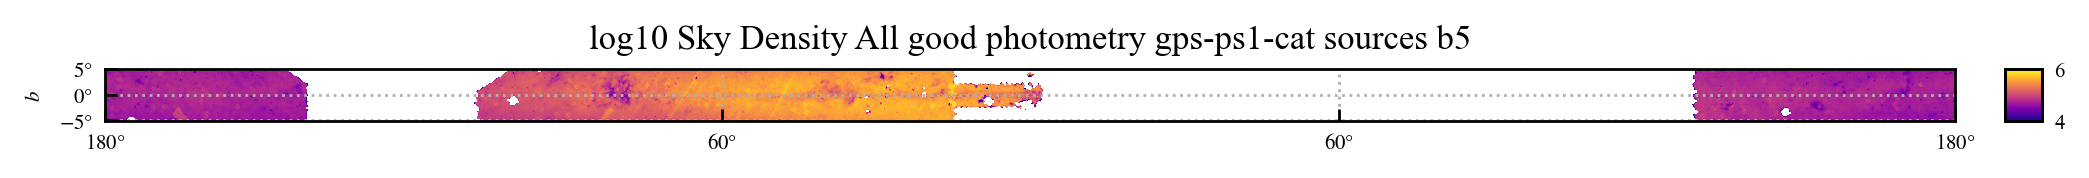

In [27]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
fig, (ax1) = plt.subplots(nrows=1, figsize=(10,3))
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='2%', pad=0.2)

im = ax1.imshow(np.log10(cmallgood_b5).data,
                origin='lower',
                cmap='plasma',
#                 norm=mpl.colors.Normalize(vmin=0, vmax=np.nanmax(cmgpq))
               )
ax1.set_xticks(np.arange(0, 1801, 600))
ax1.set_xticklabels((r'$180\degree$',r'$60\degree$',
                      r'$60\degree$',r'$180\degree$'))

ax1.set_yticks(np.arange(0, 51, 25))
ax1.set_yticklabels((r'$-5\degree$',r'$0\degree$',r'$5\degree$'))
ax1.set_ylabel(r"$b$")
ax1.grid(linestyle=':')
cbar1 = fig.colorbar(im, cax=cax, 
                     orientation='vertical',
                     label='Density [$\mathrm{deg}^{-2}$]')
cbar1.ax.yaxis.label.set_size(10)
ax1.title.set_text('log10 Sky Density All good photometry gps-ps1-cat sources b5')

im.set_clim(4, 6)
plt.colorbar(im, cax=cax)
plt.show()

In [20]:
np.save('/cargo/public/catdata/gpq_nir/cmallgood_b5.npy',cmallgood_b5)

In [ ]:
combined_csv.to_h5('/cargo/public/catdata/gps-ps1-cat-coord/n256hp_goodph_combined.h5', key=df)

In [28]:
combined_csv.to_csv('/cargo/public/catdata/gpq_nir/GPPcoords-goodph.csv', index=False)